In [30]:
import pandas as pd
import matplotlib.pyplot as plt
#allows me to make the nice chart in output
from IPython.display import display
import contextily as ctx
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns; sns.set()
from shapely.geometry import Polygon, MultiPolygon, Point
import numpy as np
#data is in DatafourtoFive

df = pd.read_csv("/Users/joshuahernandez/Documents/GitHub/HeliosProjectDS/Solar_flare_RHESSI_2004_05.csv")
gdf = gpd.GeoDataFrame(df,geometry=gpd.points_from_xy(df['x.pos.asec'],df['y.pos.asec']))

gdf.loc[gdf['year'] == 2005, 'month'] +=12

# Set the batch parameters
batchMaxSize = 4
overlap = 2

# Get the maximum value of the 'month' column
max_month = gdf['month'].max()

# Create an array to store the batches of GeoDataFrames
geodataframes = []


# Go through the data and create batches
for start_month in range(1, max_month - batchMaxSize + 2, batchMaxSize - overlap):
    end_month = start_month + batchMaxSize - 1
    # Create a batch within the specified 'start_month' and 'end_month' range
    batch = gdf[(gdf['month'] >= start_month) & (gdf['month'] <= end_month)]
    geodataframes.append(batch)

# #UNCOMMENT TO SEE ALL THE DATA FRAMES
# for idx, batch in enumerate(geodataframes):
#     display(batch)


print(len(geodataframes))

11


In [2]:
currentbranch = geodataframes[3]

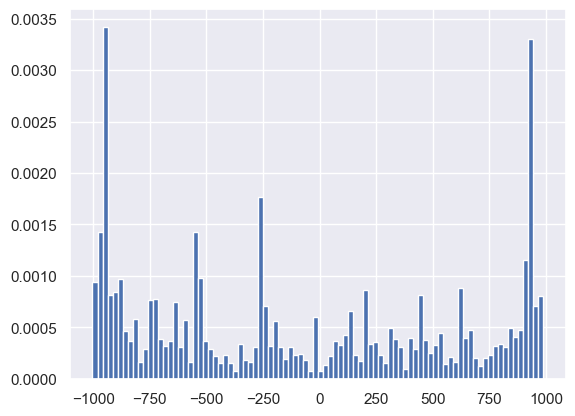

In [4]:
#method1

xFirstchart= currentbranch['x.pos.asec']
yFirstchart= currentbranch['total.counts']

histMethod1x = plt.hist(xFirstchart, bins=90, weights=yFirstchart, density=True)

# Now 'hist' will have y-values based on the 'total.counts' column, and x-values based on the 'x.pos.asec' column.


In [5]:
xsecondChart= currentbranch['y.pos.asec']
ysecondCHart= currentbranch['total.counts']
#end of method1 and task3

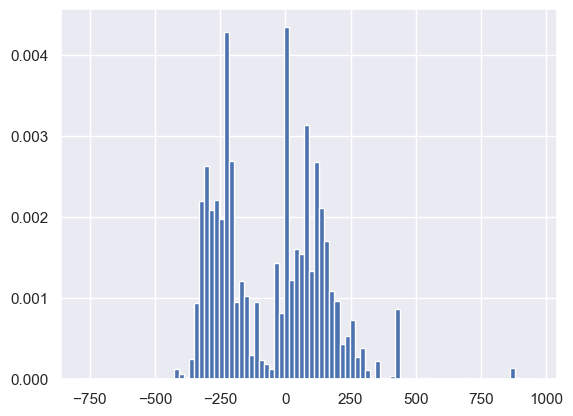

In [6]:
histMethod1y = plt.hist(xsecondChart, bins=90, weights=ysecondCHart, density=True)

In [7]:
# hist_x,bin_edges_x = np.histogram(xFirstchart, bins=90, weights=yFirstchart, density=True)
# hist_y, bin_edges_y = np.histogram(xsecondChart, bins=90, weights=ysecondCHart, density=True)

# #calculating bin ceneters
# bin_centers_x = (bin_edges_x[:-1] + bin_edges_x[1:]) / 2
# bin_centers_y = (bin_edges_y[:-1] + bin_edges_y[1:]) / 2

# levels = [0.2, 0.4, 0.6, 0.8, 1]

# # Create plot
# f, ax = plt.subplots(ncols=1, figsize=(20, 8))

# # Kernel Density Estimation
# kde = sns.kdeplot(
#     ax=ax,
#     x=np.repeat(bin_centers_x, len(bin_centers_y)),  # Repeat x bin centers for each y value
#     y=np.tile(bin_centers_y, len(bin_centers_x)),  # Tile y bin centers for each x value
#     levels=levels,
#     fill=True,
#     cmap='Reds',
#     alpha=0.9
# )

# ax.set_axis_off()
# ctx.add_basemap(ax=ax,crs = currentbranch.crs.to_string(), source=ctx.providers.CartoDB.Positron)
# plt.tight_layout()

# plt.show()

In [8]:
#method 2
x= currentbranch['x.pos.asec']
y= currentbranch['total.counts']

# Assuming currentbranch is your DataFrame
currentbranch['result'] = currentbranch.apply(lambda row: row['energy.kev'] * row['duration.s'], axis=1)
# display(currentbranch)

# hist = plt.hist(x, bins=90, weights=y, density=True)

# Create a DataFrame (you should have your DataFrame loaded)
data = currentbranch['energy.kev']
df = pd.DataFrame(data)

# Parse the values from the 'column_name' using a hyphen as a separator
df[['start', 'end']] = currentbranch['energy.kev'].str.split('-', expand=True)

# Convert 'start' and 'end' columns to numeric
df['start'] = pd.to_numeric(df['start'])
df['end'] = pd.to_numeric(df['end'])

# Calculate the median for each row and store it in a new column 'result'
currentbranch['median'] = df[['start', 'end']].median(axis=1)
# The 'start' and 'end' columns now contain the parsed values
# display(currentbranch)


currentbranch['result'] = currentbranch["median"]*currentbranch["duration.s"]

display(currentbranch)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/geopandas/geodataframe.py:1543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/geopandas/geodataframe.py:1543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


,duration.s,peak.c/s,total.counts,energy.kev,x.pos.asec,y.pos.asec,radial,active.region.ar,flag.1,flag.2,...,dt.peak,dt.end,year,month,day,energy.kev.i,energy.kev.f,geometry,result,median
4987,192,28,25680.0,6-12,-347,-232,418,0,A0,DR,...,2004-07-01 14:19:46,2004-07-01 14:21:28,2004,7,1,6,12,POINT (-347.000 -232.000),1728.0,9.0
4988,292,656,546888.0,12-25,-404,102,417,0,A0,GE,...,2004-07-01 14:33:50,2004-07-01 14:35:56,2004,7,1,12,25,POINT (-404.000 102.000),5402.0,18.5
4989,212,26,20928.0,6-12,-270,99,288,639,A0,DF,...,2004-07-02 06:46:38,2004-07-02 06:48:40,2004,7,2,6,12,POINT (-270.000 99.000),1908.0,9.0
4990,408,400,257472.0,6-12,-96,-234,253,0,A0,P1,...,2004-07-02 17:46:06,2004-07-02 17:49:36,2004,7,2,6,12,POINT (-96.000 -234.000),3672.0,9.0
4991,172,26,16560.0,6-12,-56,102,116,639,A0,P1,...,2004-07-03 04:39:38,2004-07-03 04:41:24,2004,7,3,6,12,POINT (-56.000 102.000),1548.0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8659,2152,624,1911050.0,25-50,653,148,669,691,a0,A1,...,2004-10-31 21:25:02,2004-10-31 21:54:12,2004,10,31,25,50,POINT (653.000 148.000),80700.0,37.5
8660,376,26,46224.0,6-12,680,136,693,691,A0,DF,...,2004-10-31 22:59:42,2004-10-31 23:02:16,2004,10,31,6,12,POINT (680.000 136.000),3384.0,9.0
8661,176,68,37824.0,6-12,-317,-299,436,693,A0,DF,...,2004-10-31 23:07:42,2004-10-31 23:08:56,2004,10,31,6,12,POINT (-317.000 -299.000),1584.0,9.0
8662,80,52,15168.0,6-12,-318,-299,437,693,A0,DF,...,2004-10-31 23:09:50,2004-10-31 23:10:40,2004,10,31,6,12,POINT (-318.000 -299.000),720.0,9.0


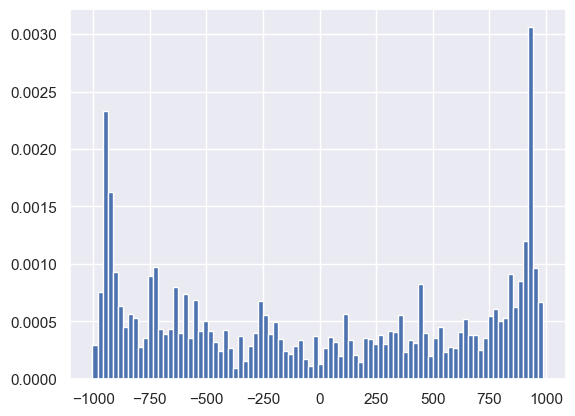

In [9]:
#method 2 for task3
x_2= currentbranch['x.pos.asec']
y_2= currentbranch['result']

hist2 = plt.hist(x_2, bins=90, weights=y_2, density=True)

# Now 'hist' will have y-values based on the 'total.counts' column, and x-values based on the 'x.pos.asec' column.

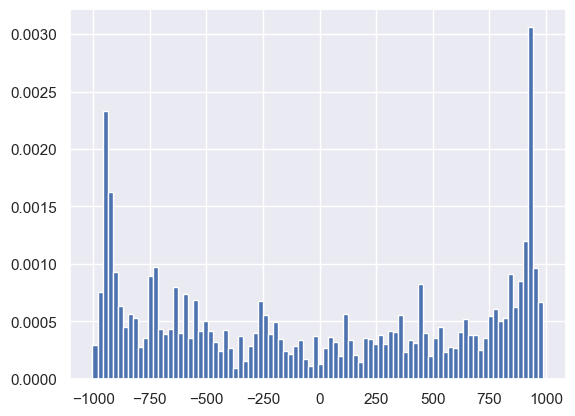

In [10]:
#method 2 for task3
x_2= currentbranch['x.pos.asec']
y_2= currentbranch['result']

hist2 = plt.hist(x_2, bins=90, weights=y_2, density=True)

# Now 'hist' will have y-values based on the 'total.counts' column, and x-values based on the 'x.pos.asec' column.

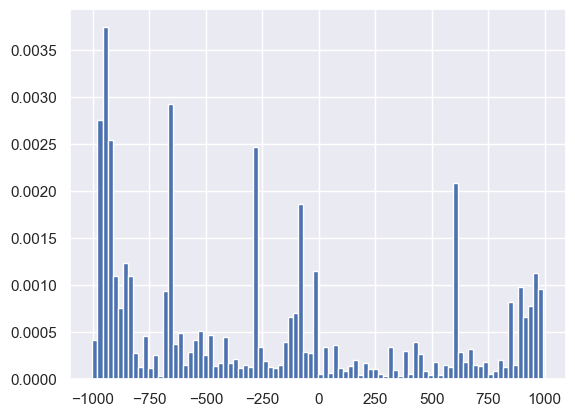

In [11]:
#method1 for task4
lastbatch = geodataframes[10]
x_lastbatch= lastbatch['x.pos.asec']
y_lastbatch= lastbatch['total.counts']

hist = plt.hist(x_lastbatch, bins=90, weights=y_lastbatch, density=True)


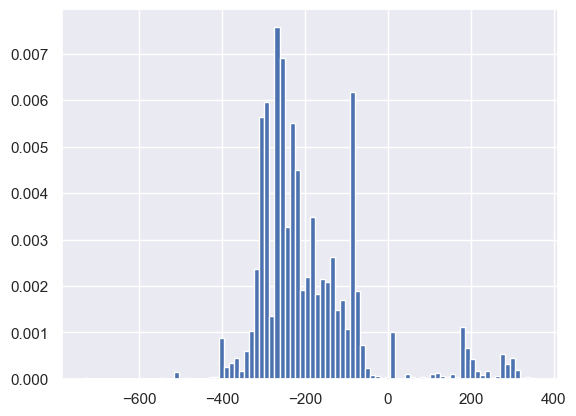

In [12]:
#method1 for task4
x_l= lastbatch['y.pos.asec']
y_l= lastbatch['total.counts']

hist = plt.hist(x_l, bins=90, weights=y_l, density=True)

In [13]:
#method2 for task4
x= lastbatch['x.pos.asec']
y= lastbatch['total.counts']

# Assuming currentbranch is your DataFrame
lastbatch['result'] = lastbatch.apply(lambda row: row['energy.kev'] * row['duration.s'], axis=1)
# display(currentbranch)

# hist = plt.hist(x, bins=90, weights=y, density=True)

# Create a DataFrame (you should have your DataFrame loaded)
data = lastbatch['energy.kev']
df = pd.DataFrame(data)

# Parse the values from the 'column_name' using a hyphen as a separator
df[['start', 'end']] = lastbatch['energy.kev'].str.split('-', expand=True)

# Convert 'start' and 'end' columns to numeric
df['start'] = pd.to_numeric(df['start'])
df['end'] = pd.to_numeric(df['end'])

# Calculate the median for each row and store it in a new column 'result'
lastbatch['median'] = df[['start', 'end']].median(axis=1)
# The 'start' and 'end' columns now contain the parsed values
# display(currentbranch)


lastbatch['result'] = lastbatch["median"]*lastbatch["duration.s"]

display(lastbatch)



/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/geopandas/geodataframe.py:1543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/geopandas/geodataframe.py:1543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


,duration.s,peak.c/s,total.counts,energy.kev,x.pos.asec,y.pos.asec,radial,active.region.ar,flag.1,flag.2,...,dt.peak,dt.end,year,month,day,energy.kev.i,energy.kev.f,geometry,result,median
15542,2736,112,863496.0,6-12,-218,-332,397,806,A0,DR,...,2005-09-01 23:17:42,2005-09-01 23:59:04,2005,21,1,6,12,POINT (-218.000 -332.000),24624.0,9.0
15543,736,136,225888.0,6-12,597,108,606,0,A0,DR,...,2005-09-02 13:39:42,2005-09-02 13:50:16,2005,21,2,6,12,POINT (597.000 108.000),6624.0,9.0
15544,1076,192,396312.0,12-25,631,113,641,0,A0,P1,...,2005-09-02 20:20:50,2005-09-02 20:35:32,2005,21,2,12,25,POINT (631.000 113.000),19906.0,18.5
15545,264,30,39312.0,6-12,133,355,379,0,A0,P1,...,2005-09-02 23:24:46,2005-09-02 23:28:04,2005,21,2,6,12,POINT (133.000 355.000),2376.0,9.0
15546,388,38,64368.0,6-12,88,-363,373,805,A0,P1,...,2005-09-02 23:29:58,2005-09-02 23:34:32,2005,21,2,6,12,POINT (88.000 -363.000),3492.0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17501,704,24,72312.0,6-12,-279,229,362,841,A0,DF,...,2005-12-29 21:39:50,2005-12-29 21:50:24,2005,24,29,6,12,POINT (-279.000 229.000),6336.0,9.0
17502,212,22,24624.0,6-12,-402,238,468,841,A0,DF,...,2005-12-29 22:08:18,2005-12-29 22:10:48,2005,24,29,6,12,POINT (-402.000 238.000),1908.0,9.0
17503,584,184,332976.0,6-12,-251,243,350,843,A0,GD,...,2005-12-30 16:50:02,2005-12-30 16:56:48,2005,24,30,6,12,POINT (-251.000 243.000),5256.0,9.0
17504,512,56,101424.0,6-12,-250,228,339,0,A0,P1,...,2005-12-30 20:21:22,2005-12-30 20:26:52,2005,24,30,6,12,POINT (-250.000 228.000),4608.0,9.0


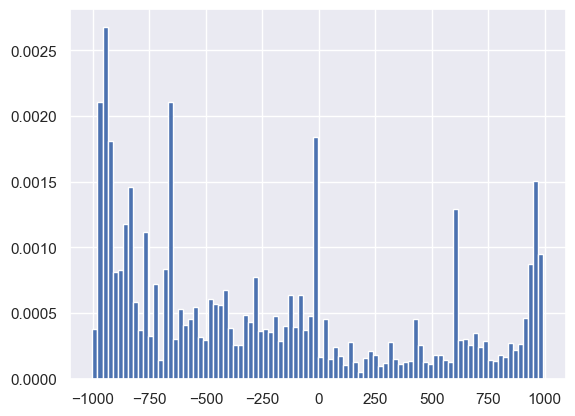

In [14]:
#method 2 for task4 lastbatch
x_2= lastbatch['x.pos.asec']
y_2= lastbatch['result']

hist2 = plt.hist(x_2, bins=90, weights=y_2, density=True)


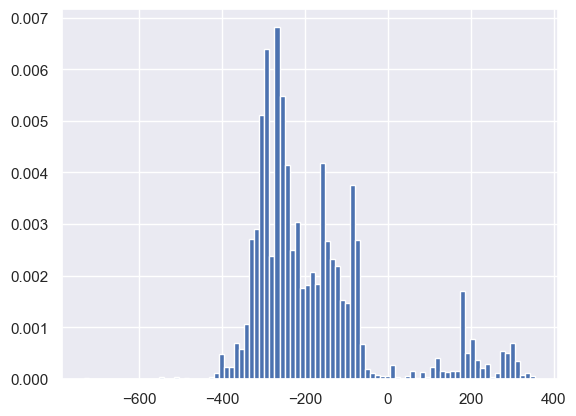

In [15]:
#method 2 for task4 lastbatch
x_l= lastbatch['y.pos.asec']
y_l= lastbatch['result']

hist = plt.hist(x_l, bins=90, weights=y_l, density=True)

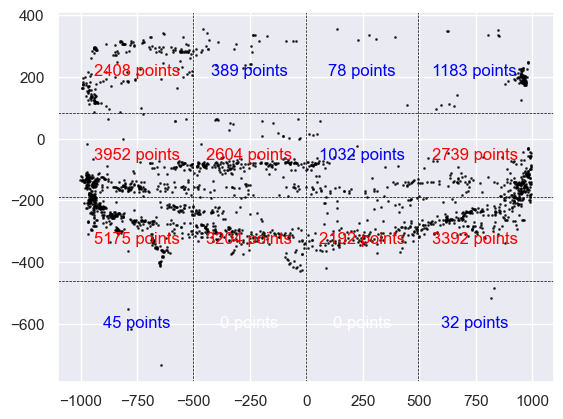

In [29]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming x_list and y_list are your x and y coordinates
x_list = lastbatch['x.pos.asec']
y_list = lastbatch['y.pos.asec']

# Define boundaries for quadrants
x_mid = np.median(x_list)
y_mid = np.median(y_list)

# Assign each point to a quadrant
quadrant = np.zeros(len(x_list))
quadrant[(x_list > x_mid) & (y_list > y_mid)] = 1  # Quadrant I
quadrant[(x_list < x_mid) & (y_list > y_mid)] = 2  # Quadrant II
quadrant[(x_list < x_mid) & (y_list < y_mid)] = 3  # Quadrant III
quadrant[(x_list > x_mid) & (y_list < y_mid)] = 4  # Quadrant IV

# Additional quadrants
quadrant[(x_list > x_mid) & (y_list > y_mid)] = 5  # Quadrant V
quadrant[(x_list < x_mid) & (y_list > y_mid)] = 6  # Quadrant VI
quadrant[(x_list < x_mid) & (y_list < y_mid)] = 7  # Quadrant VII
quadrant[(x_list > x_mid) & (y_list < y_mid)] = 8  # Quadrant VIII

# Additional quadrants
quadrant[(x_list > x_mid) & (y_list > y_mid)] = 9  # Quadrant IX
quadrant[(x_list < x_mid) & (y_list > y_mid)] = 10  # Quadrant X
quadrant[(x_list < x_mid) & (y_list < y_mid)] = 11  # Quadrant XI
quadrant[(x_list > x_mid) & (y_list < y_mid)] = 12  # Quadrant XII

# Additional quadrants
quadrant[(x_list > x_mid) & (y_list > y_mid)] = 13  # Quadrant XIII
quadrant[(x_list < x_mid) & (y_list > y_mid)] = 14  # Quadrant XIV
quadrant[(x_list < x_mid) & (y_list < y_mid)] = 15  # Quadrant XV
quadrant[(x_list > x_mid) & (y_list < y_mid)] = 16  # Quadrant XVI

# Create a 2D histogram to get the count in each quadrant
hist, x_edges, y_edges = np.histogram2d(x_list, y_list, bins=[4, 4], range=[[min(x_list), max(x_list)], [min(y_list), max(y_list)]], weights=quadrant)

# Define a threshold
threshold = 2000

# Create a mask for quadrants with data
data_mask = hist > 0

# Plot the scatter plot with different colors for each quadrant
scatter = plt.scatter(x_list, y_list, c='black', alpha=0.7, s=1)

# Draw grid lines to represent quadrant borders
for i in range(1, 4):
    plt.axvline(x=x_edges[i], color='black', linestyle='--', linewidth=0.5)
for j in range(1, 4):
    plt.axhline(y=y_edges[j], color='black', linestyle='--', linewidth=0.5)

# Annotate counts in each quadrant
for i in range(4):
    for j in range(4):
        if hist[i, j] > threshold:
            color = 'red'
        else:
            color = 'blue' if data_mask[i, j] else 'white'
        plt.annotate(f'{int(hist[i, j])} points', xy=(x_edges[i] + 0.5 * (x_edges[i + 1] - x_edges[i]), y_edges[j] + 0.5 * (y_edges[j + 1] - y_edges[j])), ha='center', va='center', color=color)

plt.show()



In [32]:
# import numpy as np
# import matplotlib.pyplot as plt
# import cartopy.crs as ccrs
# from sklearn.neighbors import KernelDensity

# # Assuming x_list and y_list are your x and y coordinates
# x_list = lastbatch['x.pos.asec']
# y_list = lastbatch['y.pos.asec']

# # Set up the data grid for the contour plot
# X, Y = np.meshgrid(x_list[::5], y_list[::5][::-1])
# land_reference = data.coverages[6][::5, ::5]
# land_mask = (land_reference > -9999).ravel()
# xy = np.vstack([Y.ravel(), X.ravel()]).T
# xy = np.radians(xy[land_mask])

# # Create two side-by-side plots
# fig, ax = plt.subplots(1, 2, figsize=(12, 5))
# fig.subplots_adjust(left=0.05, right=0.95, wspace=0.05)
# species_names = ['Bradypus Variegatus', 'Microryzomys Minutus']
# cmaps = ['Purples', 'Reds']

# for i, axi in enumerate(ax):
#     axi.set_title(species_names[i])

#     # plot coastlines with cartopy
#     axi.set_global()
#     axi.coastlines()

#     # scatter plot
#     axi.scatter(np.degrees(xy[land_mask][:, 1]), np.degrees(xy[land_mask][:, 0]), c='blue', alpha=0.7, s=1, transform=ccrs.PlateCarree())

#     # construct a spherical kernel density estimate of the distribution
#     kde = KernelDensity(bandwidth=0.03, metric='haversine')
#     kde.fit(np.radians(latlon[species == i]))

#     # evaluate only on the land: -9999 indicates ocean
#     Z = np.full(land_mask.shape[0], -9999.0)
#     Z[land_mask] = np.exp(kde.score_samples(xy))
#     Z = Z.reshape(X.shape)

#     # plot contours of the density
#     levels = np.linspace(0, Z.max(), 25)
#     axi.contourf(X, Y, Z, levels=levels, cmap=cmaps[i], transform=ccrs.PlateCarree())

# plt.show()


In [31]:
# # Create thresholds
# levels = [0.2,0.4,0.6,0.8,1]

# # Create plot
# f, ax = plt.subplots(ncols=1, figsize=(20, 8))
# # Kernel Density Estimation
# kde = sns.kdeplot(
#     ax=ax,
#     x= currentbranch['x.pos.asec'],
#     y= currentbranch['y.pos.asec'],
#     levels = levels,
#     shade=True,
#     cmap='Reds',
#     alpha=0.9
# )
# # Add a basemap
# ctx.add_basemap(ax=ax,crs = currentbranch)
# ax.set_axis_off()
# plt.tight_layout()

# plt.show()

In [ ]:
averageoftotal_Count = currentbranch['total.counts'].mean()
print(averageoftotal_Count)

IndexError: Boolean index has wrong length: 90 instead of 3677

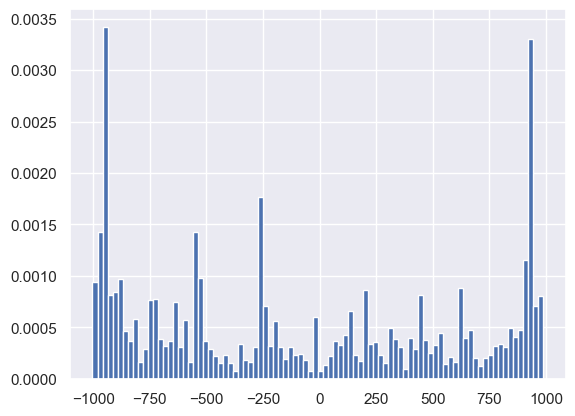

In [ ]:
# import matplotlib.pyplot as plt
# import seaborn as sns
# import contextily as ctx

# # Assuming 'currentbranch' is your DataFrame

# # Method 1 - Histogram
# x_hist = currentbranch['x.pos.asec']
# y_hist = currentbranch['total.counts']

# # Create histogram
# hist = plt.hist(x_hist, bins=90, weights=y_hist, density=True)

# # Define intensity threshold for small hotspots (d1)
# d1_threshold = 0.4  # You should adjust this based on your data characteristics

# # Identify small hotspots based on the histogram
# small_hotspots_x = x_hist[hist[0] > d1_threshold]
# small_hotspots_y = y_hist[hist[0] > d1_threshold]

# # Method 2 - KDE Plot
# x_kde = currentbranch['x.pos.asec']
# y_kde = currentbranch['y.asec.pos']

# # Create KDE plot
# levels = [0.2, 0.4, 0.6, 0.8, 1]
# f, ax = plt.subplots(ncols=1, figsize=(20, 8))
# kde = sns.kdeplot(
#     ax=ax,
#     x=x_kde,
#     y=y_kde,
#     levels=levels,
#     shade=True,
#     cmap='Reds',
#     alpha=0.9
# )

# # Add a basemap
# ctx.add_basemap(ax=ax, crs=currentbranch.crs)

# # Define intensity threshold for large hotspots (d2)
# d2_threshold = 0.6  # You should adjust this based on your data characteristics

# # Identify large hotspots based on the KDE plot
# large_hotspots_x = x_kde[y_kde > d2_threshold]
# large_hotspots_y = y_kde[y_kde > d2_threshold]

# # Plot identified hotspots
# plt.scatter(small_hotspots_x, small_hotspots_y, color='blue', label='Small Hotspots')
# plt.scatter(large_hotspots_x, large_hotspots_y, color='red', label='Large Hotspots')
# plt.legend()

# # Display the plots
# plt.show()


In [ ]:
# from shapely.geometry import Polygon, MultiPolygon

# level_polygons = []

# for col in kde.collections:
#     paths = []
#     # Loop through all polygons that have the same intensity level
#     for contour in col.get_paths(): 
#         # Create a polygon for the countour
#         # First polygon is the main countour, the rest are holes
#         for ncp, cp in enumerate(contour.to_polygons()):
#             x = currentbranch['x.pos.asec']
#             y = currentbranch['y.pos.asec']
#             intensity = currentbranch['total.counts']
#             new_shape = Polygon([(i[0], i[1]) for i in zip(x, y)]).simplify(tolerance=0.1)  # Adjust tolerance as needed
#             if ncp == 0:
#                 poly = new_shape
#             else:
#                 # Remove holes, if any
#                 poly = poly.difference(new_shape)

#         # Append polygon to list
#         paths.append(poly)
    
#     # Create a MultiPolygon for the contour
#     multi = MultiPolygon(paths)
#     # Append MultiPolygon and level as tuple to list
#     level_polygons.append((intensity.iloc[i], multi))


GEOSException: TopologyException: Input geom 0 is invalid: Self-intersection at 516.85785237198149 147.49734543586231

In [33]:
# from shapely.geometry import Polygon, MultiPolygon

# level_intensities = []

# for col in kde.collections:
#     # Loop through all polygons that have the same intensity level
#     for contour in col.get_paths():
#         # Loop through all holes and create a polygon for the main contour
#         for ncp, cp in enumerate(contour.to_polygons()):
#             x = currentbranch['x.pos.asec']
#             y = currentbranch['y.pos.asec']
#             intensity = currentbranch['total.counts']
#             new_shape = Polygon([(i[0], i[1]) for i in zip(x, y)]).simplify(tolerance=0.1)  # Adjust tolerance as needed
#             if ncp == 0:
#                 intensity_value = intensity.iloc[i]
#             else:
#                 # If there are holes, intensity_value will be None
#                 intensity_value = None

#     # Append intensity value to list
#     level_intensities.append(intensity_value)


NameError: name 'kde' is not defined